##  Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Weight')

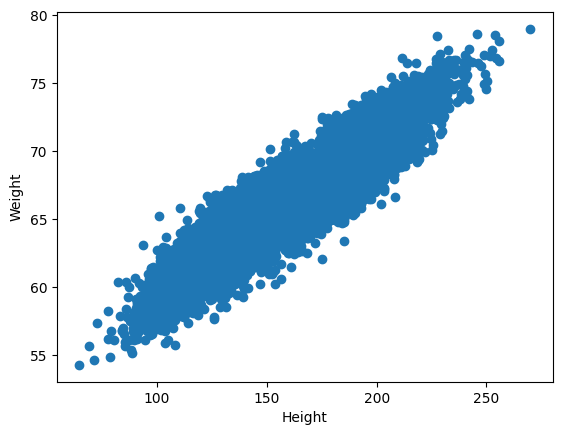

In [5]:
## scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [6]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


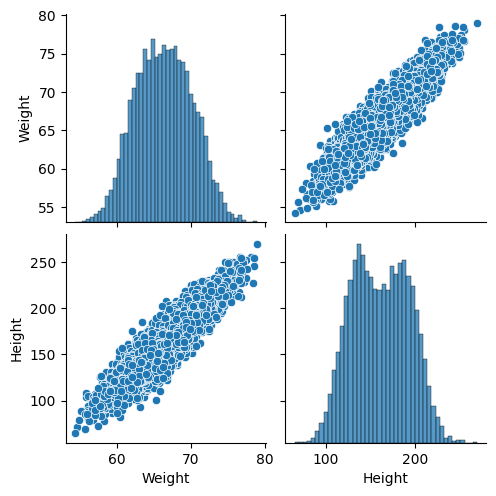

In [7]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
### independent and dependent features
X=df[['Weight']] ## independent features should be data frame or 2 dimensional array
y=df['Height'] ## this variable can be in series or 1d array

In [9]:
X_series=df['Weight']
np.array(X_series).shape

(10000,)

In [10]:
np.array(y).shape

(10000,)

In [11]:
## train test split
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape

(7500, 1)

In [14]:
## standardization
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
X_test

array([[ 0.60863475],
       [ 0.64561305],
       [ 0.01295416],
       ...,
       [-1.48363282],
       [ 0.20143303],
       [ 0.32447927]])

In [18]:
### Apply simple lilnear regression
from sklearn.linear_model import LinearRegression


In [19]:
regression=LinearRegression(n_jobs=-1)

In [20]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [21]:
print("coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

coefficient or slope: [29.59862269]
Intercept: 161.23075926386


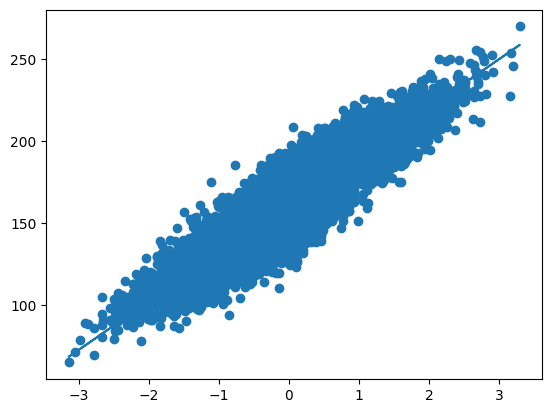

In [22]:
## plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [23]:
## prediction for test data
y_pred=regression.predict(X_test)

In [24]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

149.31479312301278
9.720990894150075
12.219443241122436


In [26]:
from sklearn.metrics import r2_score

In [27]:
score=r2_score(y_test,y_pred)
print(score)

0.8573532042714067


In [28]:
## display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8572960998695938

In [29]:
## OLS linear regression
import statsmodels.api as sm

In [30]:
model=sm.OLS(y_train,X_train).fit()

In [31]:
prediction=model.predict(X_test)
print(prediction)

[ 18.01475044  19.10925702   0.38342518 ... -43.91348812   5.96214028
   9.60413951]


In [32]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.3
Date:                Fri, 18 Oct 2024   Prob (F-statistic):                    1.09e-55
Time:                        06:06:12   Log-Likelihood:                         -48785.
No. Observations:                7500   AIC:                                  9.757e+04
Df Residuals:                    7499   BIC:                                  9.758e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
## prediction for new data
regression.predict(scaler.transform([[70]]))

array([189.35681883])